In [1]:
#!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from sklearn import preprocessing
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':"1-0_P499jdnswRsGKktQuWTIIyJ2bTotE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train1.npy')        # replace the file name with your file


In [4]:
downloaded = drive.CreateFile({'id':"147Q9ZSS1Alcdnl5DIzoGFDVoZ6q8We4J"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test2.npy')        # replace the file name with your file


In [5]:
downloaded = drive.CreateFile({'id':"1-060cpLO21ldHyQh6jZHVMzanwpvmSIf"})   # replace the id with id of file you want to access
downloaded.GetContentFile('trainz.npy') 

In [6]:
downloaded = drive.CreateFile({'id':"1-1VkSISOWJOWsP1OaUjb2BwILh0X35eU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('traine.npy') 

In [7]:
downloaded = drive.CreateFile({'id':"1-6B6pJxvcyFY9jcfIwkFFePDV4EL4BKE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('testz.npy') 

In [8]:
downloaded = drive.CreateFile({'id':"1-7tP5AMEivbx1aR9DljnEkYMJeYLLIiD"})   # replace the id with id of file you want to access
downloaded.GetContentFile('teste.npy') 

In [9]:
Y_Train_Mel=np.load("train1.npy")
Y_Test_Mel=np.load("test2.npy")

X_Train1=np.load("trainz.npy")
X_Train2=np.load("traine.npy")
X_Test1=np.load("testz.npy")
X_Test2=np.load("teste.npy")

In [10]:
X_Train1=np.array(X_Train1)
X_Train1=X_Train1.reshape(X_Train1.shape[0],157)

X_Train2=np.array(X_Train2)
X_Train2=X_Train2.reshape(X_Train2.shape[0],157)

X_Test1=np.array(X_Test1)
X_Test1=X_Test1.reshape(2233,157)

X_Test2=np.array(X_Test2)
X_Test2=X_Test2.reshape(2233,157)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Train1)
X_Train1 = scaler.transform(X_Train1)
X_Test1 = scaler.transform(X_Test1)
scaler.fit(X_Train2)
X_Train2 = scaler.transform(X_Train2)
X_Test2 = scaler.transform(X_Test2)

In [14]:
print(X_Train.shape)

(26045, 157, 2)


In [13]:
X_Test=np.dstack((X_Test1,X_Test2))
X_Train=np.dstack((X_Train1,X_Train2))


In [ ]:
print(X_Train.shape)

(26045, 157, 2)


In [15]:
from tensorflow import keras
from keras import models,optimizers
from tensorflow.keras.layers import Dense,Conv1D,Flatten,MaxPool1D,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras import regularizers

In [16]:
from keras.layers import Embedding, LSTM
from keras.layers import Input,Activation
from keras.layers import AveragePooling1D

In [17]:

def plot_loss_and_accuracy(history,epoch_number):

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(14.5, 8.5)
  epochs = range(0,epoch_number)
  fig.suptitle('Loss and Accuracy')
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']

  ax1.plot(epochs, loss_train, 'g', label='Training Loss')
  ax1.plot(epochs, loss_val, 'b', label='Validation Loss')
  ax1.set_title('Training and Validation loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.legend()
  try:
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
  except:
    acc_train = history.history['acc']
    acc_val = history.history['val_acc']

  ax2.plot(epochs, acc_train, 'g', label='Training Accuracy')
  ax2.plot(epochs, acc_val, 'b', label='Validation Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  plt.legend()



  plt.show()

In [35]:
keras.backend.clear_session()
model=Sequential()

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.add(Conv1D(256 ,kernel_size=3,activation='relu',padding="same",input_shape=(157,2)))
model.add(Conv1D(256 ,kernel_size=3,activation='relu',padding="same"))
model.add(MaxPool1D(pool_size=2,strides=2))
model.add(Dropout(0.3))

model.add(Conv1D(128 ,kernel_size=5,activation='relu'))
model.add(Conv1D(128 ,kernel_size=5,activation='relu'))
model.add(MaxPool1D(pool_size=2,strides=2))
model.add(Dropout(0.3))


model.add(Conv1D(64 ,kernel_size=7,activation='relu'))
model.add(Conv1D(64 ,kernel_size=7,activation='relu'))
model.add(MaxPool1D(pool_size=2,strides=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)


model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 157, 256)          1792      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 157, 256)          196864    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 78, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 78, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 74, 128)           163968    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 70, 128)           82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 35, 128)           0

In [36]:
#history=model.fit(X_Train,Y_Train,validation_data=(X_Val, Y_Val),epochs=30,batch_size=32)


history=model.fit(X_Train,Y_Train_Mel,validation_split=0.05,epochs=40,batch_size=32,callbacks=[callback])


Epoch 1/40
774/774 [==============================] - 7s 8ms/step - loss: 4.8651 - accuracy: 0.3317 - val_loss: 3.0255 - val_accuracy: 0.3285
Epoch 2/40
774/774 [==============================] - 6s 8ms/step - loss: 2.3889 - accuracy: 0.3932 - val_loss: 2.0582 - val_accuracy: 0.3615
Epoch 3/40
774/774 [==============================] - 6s 8ms/step - loss: 1.8324 - accuracy: 0.4114 - val_loss: 1.7703 - val_accuracy: 0.3922
Epoch 4/40
774/774 [==============================] - 6s 8ms/step - loss: 1.6188 - accuracy: 0.4284 - val_loss: 1.5931 - val_accuracy: 0.4129
Epoch 5/40
774/774 [==============================] - 6s 8ms/step - loss: 1.5278 - accuracy: 0.4357 - val_loss: 1.5630 - val_accuracy: 0.3998
Epoch 6/40
774/774 [==============================] - 6s 8ms/step - loss: 1.4757 - accuracy: 0.4479 - val_loss: 1.5178 - val_accuracy: 0.4198
Epoch 7/40
774/774 [==============================] - 6s 8ms/step - loss: 1.4413 - accuracy: 0.4507 - val_loss: 1.5012 - val_accuracy: 0.4244
Epoch 

In [40]:
##Normalizing test data should be made 

score, acc = model.evaluate(X_Test, Y_Test_Mel, batch_size=1)
#print('Test score:', score)
print('Test accuracy:', acc)

2233/2233 [==============================] - 6s 3ms/step - loss: 1.2245 - accuracy: 0.5517
Test accuracy: 0.5517241358757019


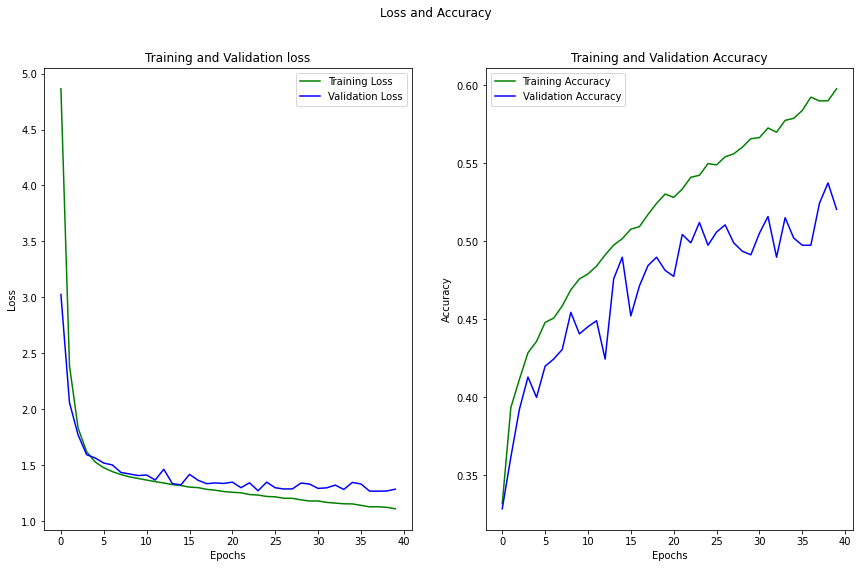

In [39]:
plot_loss_and_accuracy(history,40)

Confusion matrix, without normalization
[[277  27  11  72  10   2]
 [ 30 162  33  48  26  53]
 [ 27  22 122  95  28  61]
 [ 55  24  44 217  37  12]
 [  6  16  14  42 222  33]
 [  4  33  51  17  68 232]]


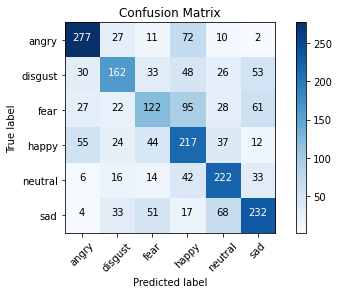

In [42]:
import itertools

y_pred = model.predict(X_Test)
y_pred = np.argmax(y_pred, axis=1)
y_check = np.argmax(Y_Test_Mel, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_check, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')    

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_check, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       399
           1       0.57      0.46      0.51       352
           2       0.44      0.34      0.39       355
           3       0.44      0.56      0.49       389
           4       0.57      0.67      0.61       333
           5       0.59      0.57      0.58       405

    accuracy                           0.55      2233
   macro avg       0.55      0.55      0.55      2233
weighted avg       0.55      0.55      0.55      2233

